In [ ]:
%pip install h2o

In [ ]:
import pandas as pd
pd.options.display.max_rows=999
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Data/BrainTumor/BrainTumorData.csv")
print(data.columns)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
data=data.fillna(method='ffill')

In [ ]:
X=data[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']].values
#y=data['diagnosis'].values

In [ ]:
y=data['diagnosis'].values
y=y.reshape(-1,1)
print(X.shape)

(569, 31)


In [ ]:
X

array([[17.99, 10.38, 122.8, ..., 0.4601, 0.1189, 'M'],
       [20.57, 17.77, 132.9, ..., 0.275, 0.08902, 'M'],
       [19.69, 21.25, 130.0, ..., 0.3613, 0.08757999999999999, 'M'],
       ...,
       [16.6, 28.08, 108.3, ..., 0.2218, 0.0782, 'M'],
       [20.6, 29.33, 140.1, ..., 0.4087, 0.124, 'M'],
       [7.76, 24.54, 47.92, ..., 0.2871, 0.07039, 'B']], dtype=object)

In [ ]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,6 mins 38 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.2
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_7dyh6b
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.179 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
h2o_df = h2o.H2OFrame(X)
h2o_df.describe()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Rows:569
Cols:31




,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30,C31
type,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,enum
mins,6.981,9.71,43.79,143.5,0.05263,0.01938,0.0,0.0,0.106,0.04996,0.1115,0.3602,0.757,6.8020000000000005,0.001713,0.002252,0.0,0.0,0.007882,0.0008948000000000001,7.93,12.02,50.41,185.2,0.07117000000000001,0.02729,0.0,0.0,0.1565,0.05504,
mean,14.127291739894547,19.289648506151124,91.96903339191556,654.8891036906859,0.09636028119507913,0.10434098418277679,0.08879931581722318,0.048919145869947306,0.18116186291739875,0.06279760984182786,0.4051720562390154,1.216853427065028,2.8660592267135288,40.337079086115935,0.007040978910369068,0.025478138840070295,0.03189371634446398,0.011796137082601056,0.02054229876977155,0.003794903866432336,16.269189806678376,25.677223198594042,107.26121265377856,880.5831282952548,0.13236859402460452,0.2542650439367314,0.27218848330404194,0.11460622319859404,0.2900755711775047,0.08394581722319859,
maxs,28.11,39.28,188.5,2501.0,0.1634,0.3454,0.4268,0.2012,0.304,0.09744,2.873,4.885,21.98,542.2,0.03113,0.1354,0.396,0.05279,0.07895,0.02984,36.04,49.54,251.2,4254.0,0.2226,1.058,1.252,0.29100000000000004,0.6638,0.2075,
sigma,3.5240488262120793,4.301035768166948,24.2989810387549,351.9141291816529,0.014064128137673616,0.0528127579325122,0.07971980870789352,0.03880284485915361,0.02741428133603571,0.007060362795084459,0.27731273298610387,0.5516483926172022,2.0218545540421085,45.49100551613178,0.003002517943839066,0.017908179325677395,0.030186060322988394,0.006170285174046867,0.0082663715287984,0.002646070967089195,4.833241580469323,6.146257623038323,33.602542269036356,569.3569926699494,0.022832429404835465,0.157336488913742,0.20862428060813235,0.06573234119594208,0.06186746753751871,0.01806126734889399,
zeros,0,0,0,0,0,0,13,13,0,0,0,0,0,0,0,0,13,13,0,0,0,0,0,0,0,0,13,13,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05372999999999999,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,M
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017000000000001,0.1812,0.056670000000000005,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.0186,0.0134,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.18600000000000003,0.275,0.08902,M
2,19.69,21.25,130.0,1203.0,0.1096,0.1599,0.1974,0.1279,0.2069,0.059989999999999995,0.7456,0.7869,4.585,94.03,0.00615,0.040060000000000005,0.03832,0.02058,0.0225,0.004571,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08757999999999999,M


In [ ]:
train, test = h2o_df.split_frame(ratios=[.8])
x = train.columns
y1 = 'C31'
x.remove(y1)

In [ ]:
from h2o.automl import H2OAutoML
aml = H2OAutoML(max_runtime_secs = 600, 
                # exclude_algos =['DeepLearning'], 
                seed = 1, 
                # stopping_metric ='logloss', 
                # sort_metric ='logloss', 
                balance_classes = False, 
                project_name ="Prject_1"
) 
# train model and record time % time  
aml.train(x = x, y = y1, training_frame = train) 

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
lb =aml.leaderboard
lb.head(rows = lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_grid__1_AutoML_20210501_165920_model_18,0.995795,0.0750219,0.99417,0.0220085,0.137722,0.0189675
GBM_grid__1_AutoML_20210501_165920_model_7,0.995695,0.0788569,0.993813,0.0290698,0.147154,0.0216544
GBM_grid__1_AutoML_20210501_165920_model_10,0.995614,0.0824727,0.99374,0.0301762,0.150117,0.0225352
GBM_grid__1_AutoML_20210501_165920_model_17,0.995554,0.0768522,0.993664,0.0231854,0.142689,0.0203602
GBM_grid__1_AutoML_20210501_165920_model_12,0.995433,0.0761933,0.993599,0.03253,0.14516,0.0210714
DeepLearning_grid__1_AutoML_20210501_165920_model_1,0.995433,0.10058,0.994127,0.0214553,0.153903,0.0236862
GBM_grid__1_AutoML_20210501_165920_model_13,0.995353,0.0819006,0.993666,0.0284461,0.144936,0.0210065
GBM_4_AutoML_20210501_165920,0.995272,0.0850749,0.993666,0.0237386,0.15242,0.0232318
GBM_grid__1_AutoML_20210501_165920_model_24,0.995232,0.0791264,0.993719,0.0231854,0.140649,0.0197821
GBM_grid__1_AutoML_20210501_165920_model_6,0.99479,0.0848735,0.992919,0.0255391,0.147566,0.0217759


In [ ]:
se

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20210501_165920_model_18


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,115.0,115.0,34487.0,5.0,10.0,8.73913,8.0,22.0,19.217392




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 1.423876172106209e-05
RMSE: 0.00377342837762453
LogLoss: 0.001285069433745754
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9556115287367759: 


,,B,M,Error,Rate
0,B,289.0,0.0,0.0,(0.0/289.0)
1,M,0.0,172.0,0.0,(0.0/172.0)
2,Total,289.0,172.0,0.0,(0.0/461.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.955612,1.000000,155.0
1,max f2,0.955612,1.000000,155.0
2,max f0point5,0.955612,1.000000,155.0
3,max accuracy,0.955612,1.000000,155.0
4,max precision,0.999983,1.000000,0.0
5,max recall,0.955612,1.000000,155.0
6,max specificity,0.999983,1.000000,0.0
7,max absolute_mcc,0.955612,1.000000,155.0
8,max min_per_class_accuracy,0.955612,1.000000,155.0
9,max mean_per_class_accuracy,0.955612,1.000000,155.0



Gains/Lift Table: Avg response rate: 37.31 %, avg score: 37.30 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010846,0.999974,2.680233,2.680233,1.000000,0.999981,1.000000,0.999981,0.029070,0.029070,168.023256,168.023256,0.029070
1,2,0.021692,0.999968,2.680233,2.680233,1.000000,0.999970,1.000000,0.999975,0.029070,0.058140,168.023256,168.023256,0.058140
2,3,0.030369,0.999963,2.680233,2.680233,1.000000,0.999966,1.000000,0.999973,0.023256,0.081395,168.023256,168.023256,0.081395
3,4,0.041215,0.999958,2.680233,2.680233,1.000000,0.999961,1.000000,0.999969,0.029070,0.110465,168.023256,168.023256,0.110465
4,5,0.052061,0.999954,2.680233,2.680233,1.000000,0.999955,1.000000,0.999967,0.029070,0.139535,168.023256,168.023256,0.139535
5,6,0.101952,0.999928,2.680233,2.680233,1.000000,0.999943,1.000000,0.999955,0.133721,0.273256,168.023256,168.023256,0.273256
6,7,0.151844,0.999878,2.680233,2.680233,1.000000,0.999906,1.000000,0.999939,0.133721,0.406977,168.023256,168.023256,0.406977
7,8,0.201735,0.999751,2.680233,2.680233,1.000000,0.999826,1.000000,0.999911,0.133721,0.540698,168.023256,168.023256,0.540698
8,9,0.301518,0.997851,2.680233,2.680233,1.000000,0.999147,1.000000,0.999658,0.267442,0.808140,168.023256,168.023256,0.808140
9,10,0.401302,0.004814,1.922776,2.491892,0.717391,0.713541,0.929730,0.928515,0.191860,1.000000,92.277553,149.189189,0.955017




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.018967458266573086
RMSE: 0.137722395660884
LogLoss: 0.07502194191215522
Mean Per-Class Error: 0.022008529814114386
AUC: 0.9957954454011426
AUCPR: 0.994169781909503
Gini: 0.9915908908022852

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28606581091149336: 


,,B,M,Error,Rate
0,B,283.0,6.0,0.0208,(6.0/289.0)
1,M,4.0,168.0,0.0233,(4.0/172.0)
2,Total,287.0,174.0,0.0217,(10.0/461.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,2.860658e-01,0.971098,155.0
1,max f2,2.860658e-01,0.974478,155.0
2,max f0point5,8.603714e-01,0.979899,137.0
3,max accuracy,4.634619e-01,0.978308,149.0
4,max precision,9.999994e-01,1.000000,0.0
5,max recall,4.873714e-03,1.000000,218.0
6,max specificity,9.999994e-01,1.000000,0.0
7,max absolute_mcc,2.860658e-01,0.953779,155.0
8,max min_per_class_accuracy,2.860658e-01,0.976744,155.0
9,max mean_per_class_accuracy,2.860658e-01,0.977991,155.0



Gains/Lift Table: Avg response rate: 37.31 %, avg score: 36.35 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010846,9.999990e-01,2.680233,2.680233,1.000000,0.999999,1.000000,0.999999,0.029070,0.029070,168.023256,168.023256,0.029070
1,2,0.021692,9.999980e-01,2.680233,2.680233,1.000000,0.999998,1.000000,0.999999,0.029070,0.058140,168.023256,168.023256,0.058140
2,3,0.030369,9.999959e-01,2.680233,2.680233,1.000000,0.999997,1.000000,0.999998,0.023256,0.081395,168.023256,168.023256,0.081395
3,4,0.041215,9.999930e-01,2.680233,2.680233,1.000000,0.999994,1.000000,0.999997,0.029070,0.110465,168.023256,168.023256,0.110465
4,5,0.052061,9.999893e-01,2.680233,2.680233,1.000000,0.999991,1.000000,0.999996,0.029070,0.139535,168.023256,168.023256,0.139535
5,6,0.101952,9.999543e-01,2.680233,2.680233,1.000000,0.999978,1.000000,0.999987,0.133721,0.273256,168.023256,168.023256,0.273256
6,7,0.151844,9.995087e-01,2.680233,2.680233,1.000000,0.999825,1.000000,0.999934,0.133721,0.406977,168.023256,168.023256,0.406977
7,8,0.201735,9.980430e-01,2.680233,2.680233,1.000000,0.998924,1.000000,0.999684,0.133721,0.540698,168.023256,168.023256,0.540698
8,9,0.301518,9.841717e-01,2.680233,2.680233,1.000000,0.993116,1.000000,0.997510,0.267442,0.808140,168.023256,168.023256,0.808140
9,10,0.401302,8.489853e-02,1.689712,2.433941,0.630435,0.602662,0.908108,0.899332,0.168605,0.976744,68.971183,143.394092,0.917921




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9805283,0.0139751425,0.9569892,0.98913044,0.98913044,0.9782609,0.98913044
1,auc,0.9942949,0.007659623,0.98245615,0.9994302,0.9995086,0.9905754,0.99950397
2,aucpr,0.99274164,0.0095394105,0.97758424,0.99865305,0.99927926,0.98895276,0.9992389
3,err,0.019471716,0.0139751425,0.043010753,0.010869565,0.010869565,0.02173913,0.010869565
4,err_count,1.8,1.3038405,4.0,1.0,1.0,2.0,1.0
5,f0point5,0.9719689,0.007870964,0.9593023,0.971223,0.978836,0.9722222,0.9782609
6,f1,0.9739731,0.018343436,0.94285715,0.9818182,0.9866667,0.9722222,0.98630136
7,f2,0.9761869,0.02908478,0.9269663,0.99264705,0.99462366,0.9722222,0.9944751
8,lift_top_group,2.7176676,0.3872312,2.5833333,3.4074075,2.4864864,2.5555556,2.5555556
9,logloss,0.07479117,0.06973808,0.18117529,0.026600175,0.02732382,0.111279085,0.027577499



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-05-01 17:02:52,1 min 8.881 sec,0.0,0.483629,0.660586,0.500000,0.373102,1.000000,0.626898
1,,2021-05-01 17:02:52,1 min 8.904 sec,5.0,0.329126,0.388951,0.993824,0.990943,2.680233,0.032538
2,,2021-05-01 17:02:52,1 min 8.924 sec,10.0,0.245070,0.262628,0.995755,0.993624,2.680233,0.028200
3,,2021-05-01 17:02:52,1 min 8.946 sec,15.0,0.193416,0.185977,0.997224,0.995754,2.680233,0.023861
4,,2021-05-01 17:02:52,1 min 8.976 sec,20.0,0.155851,0.133760,0.998391,0.997505,2.680233,0.015184
5,,2021-05-01 17:02:52,1 min 8.996 sec,25.0,0.133511,0.101566,0.998934,0.998331,2.680233,0.013015
6,,2021-05-01 17:02:52,1 min 9.017 sec,30.0,0.109876,0.074458,0.999658,0.999434,2.680233,0.008677
7,,2021-05-01 17:02:53,1 min 9.039 sec,35.0,0.093320,0.056427,0.999859,0.999770,2.680233,0.004338
8,,2021-05-01 17:02:53,1 min 9.059 sec,40.0,0.077811,0.042281,0.999940,0.999900,2.680233,0.002169
9,,2021-05-01 17:02:53,1 min 9.081 sec,45.0,0.065598,0.032453,0.999980,0.999966,2.680233,0.002169



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C3,108.412758,1.000000,0.203987
1,C8,79.154556,0.730122,0.148935
2,C23,63.046276,0.581539,0.118626
3,C21,56.475967,0.520935,0.106264
4,C1,52.490295,0.484171,0.098765
5,C28,47.896511,0.441798,0.090121
6,C7,25.737820,0.237406,0.048428
7,C14,20.527712,0.189348,0.038624
8,C24,10.913783,0.100669,0.020535
9,C27,10.214873,0.094222,0.019220



See the whole table with table.as_data_frame()


In [ ]:
# se = aml.leader
# metalearner = h2o.get_model(se.metalearner()['name'])
# metalearner.varimp()

In [ ]:
model = h2o.get_model('GBM_grid__1_AutoML_20210501_165920_model_18') 
model.model_performance(test)


ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.022633641677822246
RMSE: 0.1504448127315204
LogLoss: 0.06546308644153499
Mean Per-Class Error: 0.014705882352941124
AUC: 0.9966911764705884
AUCPR: 0.9942386489363896
Gini: 0.9933823529411767

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.19529458454721813: 


,,B,M,Error,Rate
0,B,66.0,2.0,0.0294,(2.0/68.0)
1,M,0.0,40.0,0.0,(0.0/40.0)
2,Total,66.0,42.0,0.0185,(2.0/108.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.195295,0.975610,41.0
1,max f2,0.195295,0.990099,41.0
2,max f0point5,0.836422,0.965909,33.0
3,max accuracy,0.195295,0.981481,41.0
4,max precision,0.999984,1.000000,0.0
5,max recall,0.195295,1.000000,41.0
6,max specificity,0.999984,1.000000,0.0
7,max absolute_mcc,0.195295,0.961441,41.0
8,max min_per_class_accuracy,0.351928,0.970588,40.0
9,max mean_per_class_accuracy,0.195295,0.985294,41.0



Gains/Lift Table: Avg response rate: 37.04 %, avg score: 35.57 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.018519,0.999975,2.70,2.700000,1.0,0.999980,1.000000,0.999980,0.050,0.050,170.0,170.000000,0.050000
1,2,0.027778,0.999959,2.70,2.700000,1.0,0.999960,1.000000,0.999973,0.025,0.075,170.0,170.000000,0.075000
2,3,0.037037,0.999956,2.70,2.700000,1.0,0.999956,1.000000,0.999969,0.025,0.100,170.0,170.000000,0.100000
3,4,0.046296,0.999948,2.70,2.700000,1.0,0.999955,1.000000,0.999966,0.025,0.125,170.0,170.000000,0.125000
4,5,0.055556,0.999926,2.70,2.700000,1.0,0.999933,1.000000,0.999961,0.025,0.150,170.0,170.000000,0.150000
5,6,0.101852,0.999881,2.70,2.700000,1.0,0.999900,1.000000,0.999933,0.125,0.275,170.0,170.000000,0.275000
6,7,0.157407,0.999757,2.70,2.700000,1.0,0.999839,1.000000,0.999900,0.150,0.425,170.0,170.000000,0.425000
7,8,0.203704,0.999234,2.70,2.700000,1.0,0.999506,1.000000,0.999810,0.125,0.550,170.0,170.000000,0.550000
8,9,0.305556,0.955615,2.70,2.700000,1.0,0.987994,1.000000,0.995872,0.275,0.825,170.0,170.000000,0.825000
9,10,0.398148,0.050666,1.89,2.511628,0.7,0.542710,0.930233,0.890485,0.175,1.000,89.0,151.162791,0.955882


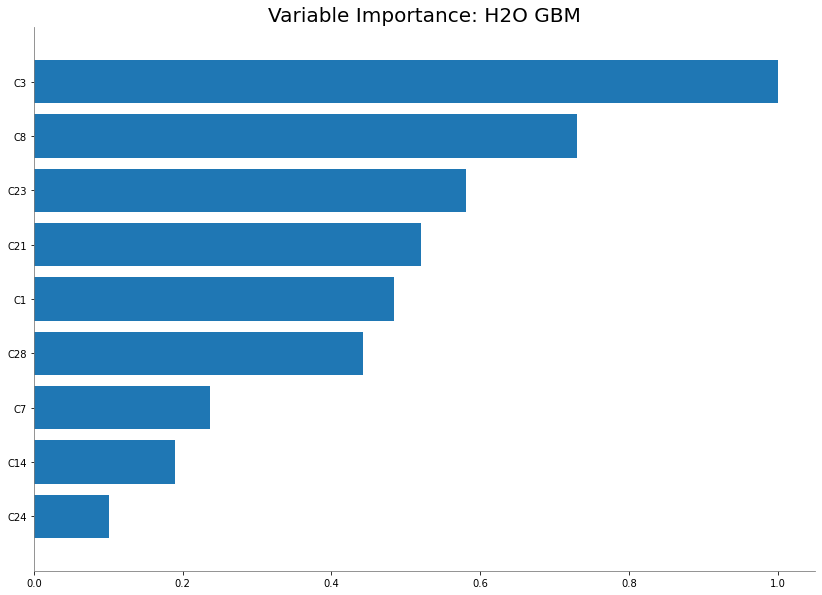

In [ ]:
model.varimp_plot(num_of_features=9)

In [ ]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GBM_grid__1_AutoML_20210501_165920_model_18,0.995795,0.0750219,0.99417,0.0220085,0.137722,0.0189675,517,0.058932,GBM
GBM_grid__1_AutoML_20210501_165920_model_7,0.995695,0.0788569,0.993813,0.0290698,0.147154,0.0216544,518,0.043562,GBM
GBM_grid__1_AutoML_20210501_165920_model_10,0.995614,0.0824727,0.99374,0.0301762,0.150117,0.0225352,825,0.043591,GBM
GBM_grid__1_AutoML_20210501_165920_model_17,0.995554,0.0768522,0.993664,0.0231854,0.142689,0.0203602,475,0.03995,GBM
GBM_grid__1_AutoML_20210501_165920_model_12,0.995433,0.0761933,0.993599,0.03253,0.14516,0.0210714,549,0.036434,GBM
DeepLearning_grid__1_AutoML_20210501_165920_model_1,0.995433,0.10058,0.994127,0.0214553,0.153903,0.0236862,5125,0.021602,DeepLearning
GBM_grid__1_AutoML_20210501_165920_model_13,0.995353,0.0819006,0.993666,0.0284461,0.144936,0.0210065,495,0.046794,GBM
GBM_4_AutoML_20210501_165920,0.995272,0.0850749,0.993666,0.0237386,0.15242,0.0232318,1311,0.047292,GBM
GBM_grid__1_AutoML_20210501_165920_model_24,0.995232,0.0791264,0.993719,0.0231854,0.140649,0.0197821,763,0.045942,GBM
GBM_grid__1_AutoML_20210501_165920_model_6,0.99479,0.0848735,0.992919,0.0255391,0.147566,0.0217759,694,0.049915,GBM


In [ ]:
model_path = h2o.save_model(model = model, path ='/content/drive/MyDrive/Model', force = True)

In [ ]:
saved_model = h2o.load_model('/content/drive/MyDrive/Model/GBM_grid__1_AutoML_20210501_165920_model_18')

In [ ]:
preds = saved_model.predict(test)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [ ]:
preds

predict,B,M
M,0.00547504,0.994525
M,0.0272028,0.972797
M,0.000482218,0.999518
M,0.000511327,0.999489
B,0.230638,0.769362
M,0.000818977,0.999181
B,0.999991,8.91538e-06
M,0.0182205,0.98178
M,4.36023e-05,0.999956
M,9.39312e-05,0.999906


In [ ]:
saved_model

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20210501_165920_model_18


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,115.0,115.0,34487.0,5.0,10.0,8.73913,8.0,22.0,19.217392




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 1.423876172106209e-05
RMSE: 0.00377342837762453
LogLoss: 0.001285069433745754
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9556115287367759: 


,,B,M,Error,Rate
0,B,289.0,0.0,0.0,(0.0/289.0)
1,M,0.0,172.0,0.0,(0.0/172.0)
2,Total,289.0,172.0,0.0,(0.0/461.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.955612,1.000000,155.0
1,max f2,0.955612,1.000000,155.0
2,max f0point5,0.955612,1.000000,155.0
3,max accuracy,0.955612,1.000000,155.0
4,max precision,0.999983,1.000000,0.0
5,max recall,0.955612,1.000000,155.0
6,max specificity,0.999983,1.000000,0.0
7,max absolute_mcc,0.955612,1.000000,155.0
8,max min_per_class_accuracy,0.955612,1.000000,155.0
9,max mean_per_class_accuracy,0.955612,1.000000,155.0



Gains/Lift Table: Avg response rate: 37.31 %, avg score: 37.30 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010846,0.999974,2.680233,2.680233,1.000000,0.999981,1.000000,0.999981,0.029070,0.029070,168.023256,168.023256,0.029070
1,2,0.021692,0.999968,2.680233,2.680233,1.000000,0.999970,1.000000,0.999975,0.029070,0.058140,168.023256,168.023256,0.058140
2,3,0.030369,0.999963,2.680233,2.680233,1.000000,0.999966,1.000000,0.999973,0.023256,0.081395,168.023256,168.023256,0.081395
3,4,0.041215,0.999958,2.680233,2.680233,1.000000,0.999961,1.000000,0.999969,0.029070,0.110465,168.023256,168.023256,0.110465
4,5,0.052061,0.999954,2.680233,2.680233,1.000000,0.999955,1.000000,0.999967,0.029070,0.139535,168.023256,168.023256,0.139535
5,6,0.101952,0.999928,2.680233,2.680233,1.000000,0.999943,1.000000,0.999955,0.133721,0.273256,168.023256,168.023256,0.273256
6,7,0.151844,0.999878,2.680233,2.680233,1.000000,0.999906,1.000000,0.999939,0.133721,0.406977,168.023256,168.023256,0.406977
7,8,0.201735,0.999751,2.680233,2.680233,1.000000,0.999826,1.000000,0.999911,0.133721,0.540698,168.023256,168.023256,0.540698
8,9,0.301518,0.997851,2.680233,2.680233,1.000000,0.999147,1.000000,0.999658,0.267442,0.808140,168.023256,168.023256,0.808140
9,10,0.401302,0.004814,1.922776,2.491892,0.717391,0.713541,0.929730,0.928515,0.191860,1.000000,92.277553,149.189189,0.955017




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.018967458266573086
RMSE: 0.137722395660884
LogLoss: 0.07502194191215522
Mean Per-Class Error: 0.022008529814114386
AUC: 0.9957954454011426
AUCPR: 0.994169781909503
Gini: 0.9915908908022852

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.28606581091149336: 


,,B,M,Error,Rate
0,B,283.0,6.0,0.0208,(6.0/289.0)
1,M,4.0,168.0,0.0233,(4.0/172.0)
2,Total,287.0,174.0,0.0217,(10.0/461.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,2.860658e-01,0.971098,155.0
1,max f2,2.860658e-01,0.974478,155.0
2,max f0point5,8.603714e-01,0.979899,137.0
3,max accuracy,4.634619e-01,0.978308,149.0
4,max precision,9.999994e-01,1.000000,0.0
5,max recall,4.873714e-03,1.000000,218.0
6,max specificity,9.999994e-01,1.000000,0.0
7,max absolute_mcc,2.860658e-01,0.953779,155.0
8,max min_per_class_accuracy,2.860658e-01,0.976744,155.0
9,max mean_per_class_accuracy,2.860658e-01,0.977991,155.0



Gains/Lift Table: Avg response rate: 37.31 %, avg score: 36.35 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010846,9.999990e-01,2.680233,2.680233,1.000000,0.999999,1.000000,0.999999,0.029070,0.029070,168.023256,168.023256,0.029070
1,2,0.021692,9.999980e-01,2.680233,2.680233,1.000000,0.999998,1.000000,0.999999,0.029070,0.058140,168.023256,168.023256,0.058140
2,3,0.030369,9.999959e-01,2.680233,2.680233,1.000000,0.999997,1.000000,0.999998,0.023256,0.081395,168.023256,168.023256,0.081395
3,4,0.041215,9.999930e-01,2.680233,2.680233,1.000000,0.999994,1.000000,0.999997,0.029070,0.110465,168.023256,168.023256,0.110465
4,5,0.052061,9.999893e-01,2.680233,2.680233,1.000000,0.999991,1.000000,0.999996,0.029070,0.139535,168.023256,168.023256,0.139535
5,6,0.101952,9.999543e-01,2.680233,2.680233,1.000000,0.999978,1.000000,0.999987,0.133721,0.273256,168.023256,168.023256,0.273256
6,7,0.151844,9.995087e-01,2.680233,2.680233,1.000000,0.999825,1.000000,0.999934,0.133721,0.406977,168.023256,168.023256,0.406977
7,8,0.201735,9.980430e-01,2.680233,2.680233,1.000000,0.998924,1.000000,0.999684,0.133721,0.540698,168.023256,168.023256,0.540698
8,9,0.301518,9.841717e-01,2.680233,2.680233,1.000000,0.993116,1.000000,0.997510,0.267442,0.808140,168.023256,168.023256,0.808140
9,10,0.401302,8.489853e-02,1.689712,2.433941,0.630435,0.602662,0.908108,0.899332,0.168605,0.976744,68.971183,143.394092,0.917921




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,accuracy,0.9805283,0.0139751425,0.9569892,0.98913044,0.98913044,0.9782609,0.98913044
1,auc,0.9942949,0.007659623,0.98245615,0.9994302,0.9995086,0.9905754,0.99950397
2,aucpr,0.99274164,0.0095394105,0.97758424,0.99865305,0.99927926,0.98895276,0.9992389
3,err,0.019471716,0.0139751425,0.043010753,0.010869565,0.010869565,0.02173913,0.010869565
4,err_count,1.8,1.3038405,4.0,1.0,1.0,2.0,1.0
5,f0point5,0.9719689,0.007870964,0.9593023,0.971223,0.978836,0.9722222,0.9782609
6,f1,0.9739731,0.018343436,0.94285715,0.9818182,0.9866667,0.9722222,0.98630136
7,f2,0.9761869,0.02908478,0.9269663,0.99264705,0.99462366,0.9722222,0.9944751
8,lift_top_group,2.7176676,0.3872312,2.5833333,3.4074075,2.4864864,2.5555556,2.5555556
9,logloss,0.07479117,0.06973808,0.18117529,0.026600175,0.02732382,0.111279085,0.027577499



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-05-01 17:02:52,1 min 8.881 sec,0.0,0.483629,0.660586,0.500000,0.373102,1.000000,0.626898
1,,2021-05-01 17:02:52,1 min 8.904 sec,5.0,0.329126,0.388951,0.993824,0.990943,2.680233,0.032538
2,,2021-05-01 17:02:52,1 min 8.924 sec,10.0,0.245070,0.262628,0.995755,0.993624,2.680233,0.028200
3,,2021-05-01 17:02:52,1 min 8.946 sec,15.0,0.193416,0.185977,0.997224,0.995754,2.680233,0.023861
4,,2021-05-01 17:02:52,1 min 8.976 sec,20.0,0.155851,0.133760,0.998391,0.997505,2.680233,0.015184
5,,2021-05-01 17:02:52,1 min 8.996 sec,25.0,0.133511,0.101566,0.998934,0.998331,2.680233,0.013015
6,,2021-05-01 17:02:52,1 min 9.017 sec,30.0,0.109876,0.074458,0.999658,0.999434,2.680233,0.008677
7,,2021-05-01 17:02:53,1 min 9.039 sec,35.0,0.093320,0.056427,0.999859,0.999770,2.680233,0.004338
8,,2021-05-01 17:02:53,1 min 9.059 sec,40.0,0.077811,0.042281,0.999940,0.999900,2.680233,0.002169
9,,2021-05-01 17:02:53,1 min 9.081 sec,45.0,0.065598,0.032453,0.999980,0.999966,2.680233,0.002169



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,C3,108.412758,1.000000,0.203987
1,C8,79.154556,0.730122,0.148935
2,C23,63.046276,0.581539,0.118626
3,C21,56.475967,0.520935,0.106264
4,C1,52.490295,0.484171,0.098765
5,C28,47.896511,0.441798,0.090121
6,C7,25.737820,0.237406,0.048428
7,C14,20.527712,0.189348,0.038624
8,C24,10.913783,0.100669,0.020535
9,C27,10.214873,0.094222,0.019220



See the whole table with table.as_data_frame()
